# Preparing data for machine learning models with dimensional reduction (variance threshold and multicollinearity) and data preprocessing

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('Loan_data.csv', index_col='member_id')

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42453 entries, 1 to 42456
Data columns (total 25 columns):
loan_amnt               42453 non-null int64
funded_amnt             42453 non-null int64
funded_amnt_inv         42453 non-null float64
term                    42453 non-null object
int_rate                42453 non-null float64
installment             42453 non-null float64
grade                   42453 non-null object
emp_length              42453 non-null object
home_ownership          42453 non-null object
annual_inc              42453 non-null float64
verification_status     42453 non-null object
loan_status             42453 non-null object
purpose                 42453 non-null object
dti                     42453 non-null float64
delinq_2yrs             42453 non-null float64
inq_last_6mths          42453 non-null float64
open_acc                42453 non-null float64
pub_rec                 42453 non-null float64
revol_bal               42453 non-null int64
revol_util 

In [4]:
# Dropping total received principle and interests, which is information not known prior to making a loan.
df1 = df1.drop(['total_rec_prncp', 'total_rec_int'], axis=1)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42453 entries, 1 to 42456
Data columns (total 23 columns):
loan_amnt               42453 non-null int64
funded_amnt             42453 non-null int64
funded_amnt_inv         42453 non-null float64
term                    42453 non-null object
int_rate                42453 non-null float64
installment             42453 non-null float64
grade                   42453 non-null object
emp_length              42453 non-null object
home_ownership          42453 non-null object
annual_inc              42453 non-null float64
verification_status     42453 non-null object
loan_status             42453 non-null object
purpose                 42453 non-null object
dti                     42453 non-null float64
delinq_2yrs             42453 non-null float64
inq_last_6mths          42453 non-null float64
open_acc                42453 non-null float64
pub_rec                 42453 non-null float64
revol_bal               42453 non-null int64
revol_util 

In [6]:
df1.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,pub_rec_bankruptcies
count,42453.000000,42453.000000,42453.000000,42453.000000,42453.000000,4.245300e+04,42453.000000,42453.000000,42453.000000,42453.000000,42453.000000,4.245300e+04,42453.000000,42453.000000,42453.000000,42453.000000
mean,11097.539632,10829.638070,10155.639179,0.121660,322.820332,6.887137e+04,13.379959,0.152333,1.077238,9.343839,0.056745,1.431529e+04,0.491080,22.128047,12030.103161,0.043860
std,7411.874988,7147.959938,7128.729027,0.037097,208.940782,5.335198e+04,6.724791,0.511984,1.511909,4.495787,0.241129,2.203399e+04,0.283449,11.593222,9097.824696,0.205705
min,500.000000,500.000000,0.000000,0.054200,15.670000,1.896000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000
25%,5200.000000,5025.000000,4950.000000,0.096300,165.670000,4.000000e+04,8.210000,0.000000,0.000000,6.000000,0.000000,3.646000e+03,0.257000,13.000000,5472.380036,0.000000
50%,9750.000000,9600.000000,8500.000000,0.119900,277.910000,5.900000e+04,13.480000,0.000000,1.000000,9.000000,0.000000,8.836000e+03,0.496000,20.000000,9695.532811,0.000000
75%,15000.000000,15000.000000,14000.000000,0.147200,428.590000,8.250000e+04,18.690000,0.000000,2.000000,12.000000,0.000000,1.726100e+04,0.726000,29.000000,16435.163945,0.000000
max,35000.000000,35000.000000,35000.000000,0.245900,1305.190000,1.900000e+06,29.990000,13.000000,33.000000,47.000000,4.000000,1.207359e+06,1.190000,90.000000,58886.473429,2.000000


In [7]:
df1.shape

(42453, 23)

In [8]:
df1.pub_rec_bankruptcies = df1.pub_rec_bankruptcies.astype('int')

In [9]:
# Columns with numeric data types
numeric_data = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'delinq_2yrs',\
               'annual_inc', 'dti', 'open_acc', 'total_acc', 'pub_rec_bankruptcies', 'pub_rec', 'inq_last_6mths',\
               'total_pymnt']

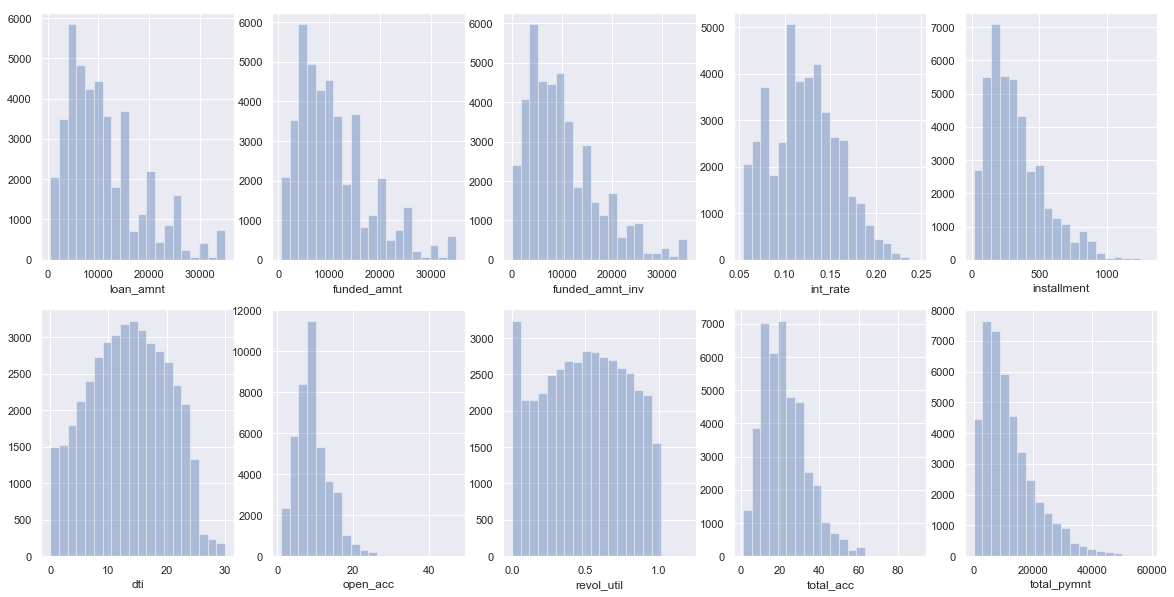

In [10]:
sns.set()
fig, ax = plt.subplots(2, 5, figsize=(20,10))
sns.distplot(df1['loan_amnt'], bins=20, ax=ax[0,0], kde=False)
sns.distplot(df1['funded_amnt'], bins=20, ax=ax[0,1], kde=False)
sns.distplot(df1['funded_amnt_inv'], bins=20, ax=ax[0,2], kde=False)
sns.distplot(df1['int_rate'], bins=20, ax=ax[0,3], kde=False)
sns.distplot(df1['installment'], bins=20, ax=ax[0,4], kde=False)
sns.distplot(df1['dti'], bins=20, ax=ax[1,0], kde=False)
sns.distplot(df1['open_acc'], bins=20, ax=ax[1,1], kde=False)
sns.distplot(df1['revol_util'], bins=20, ax=ax[1,2], kde=False)
sns.distplot(df1['total_acc'], bins=20, ax=ax[1,3], kde=False)
sns.distplot(df1['total_pymnt'], bins=20, ax=ax[1,4], kde=False)
plt.show()

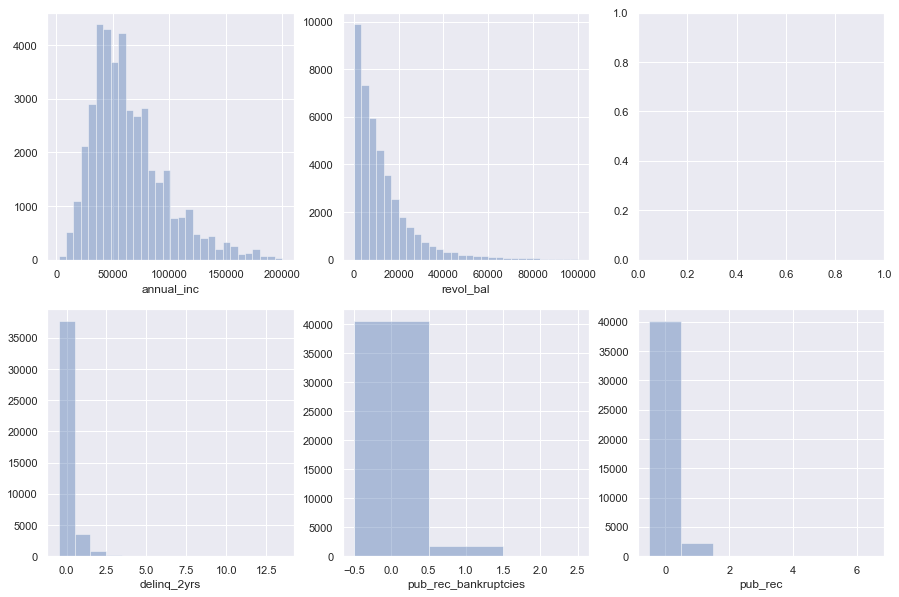

In [11]:
fig, ax = plt.subplots(2,3, figsize=(15, 10))
sns.distplot(df1[df1.annual_inc<200000].annual_inc, bins=30, ax=ax[0,0], kde=False)
sns.distplot(df1[df1.revol_bal<100000].revol_bal, bins=30, ax=ax[0,1], kde=False)
sns.distplot(df1.delinq_2yrs, bins=np.arange(-0.5,14.5,1), ax=ax[1,0], kde=False)
sns.distplot(df1.pub_rec_bankruptcies, bins=np.arange(-0.5,3.5,1), ax=ax[1,1], kde=False)
sns.distplot(df1.pub_rec, bins=np.arange(-0.5,7.5,1), ax=ax[1,2], kde=False)
plt.show()

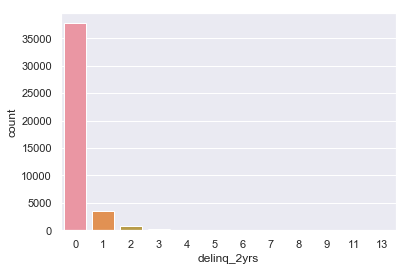

In [12]:
df1.delinq_2yrs = df1.delinq_2yrs.astype('int')
sns.countplot(df1.delinq_2yrs)
plt.show()

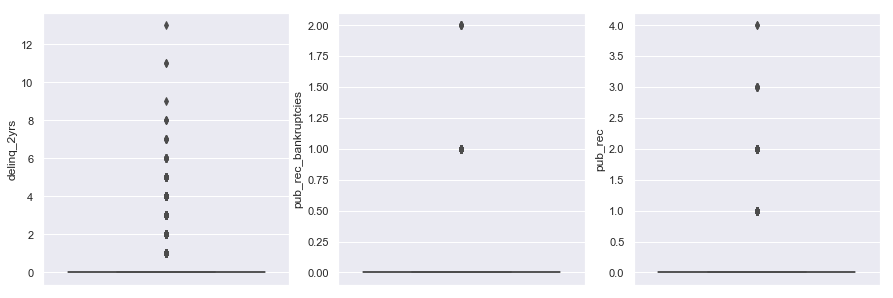

In [13]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.boxplot(data=df1, y='delinq_2yrs', ax=ax[0])
sns.boxplot(data=df1, y='pub_rec_bankruptcies', ax=ax[1])
sns.boxplot(data=df1, y='pub_rec', ax=ax[2])
plt.show()

In [14]:
# There is a lack of variation in the column containing information on bankruptcies, but to contain the information
# therein, the column is made into a categorical type
df1['pub_rec_bankruptcies'] = df1['pub_rec_bankruptcies'].replace({0:'no_bankruptcy', 1:'bankruptcy', 2:'bankruptcy'})

In [15]:
df1.pub_rec_bankruptcies.unique()

array(['no_bankruptcy', 'bankruptcy'], dtype=object)

In [16]:
# Removing bankruptcies from the numerical data t list. 
numeric_data.remove('pub_rec_bankruptcies')

In [17]:
# Dropping columns with very little variation, which is done after normalizing the data
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.005)
sel.fit(df1[numeric_data]/(df1[numeric_data].mean()))
mask = sel.get_support()
reduced_df1 = df1[numeric_data].loc[:,mask]
print('Shape of original numeric DF:', df1[numeric_data].shape)
print('Shape of reduced number DF:', reduced_df1.shape)

Shape of original numeric DF: (42453, 13)
Shape of reduced number DF: (42453, 13)


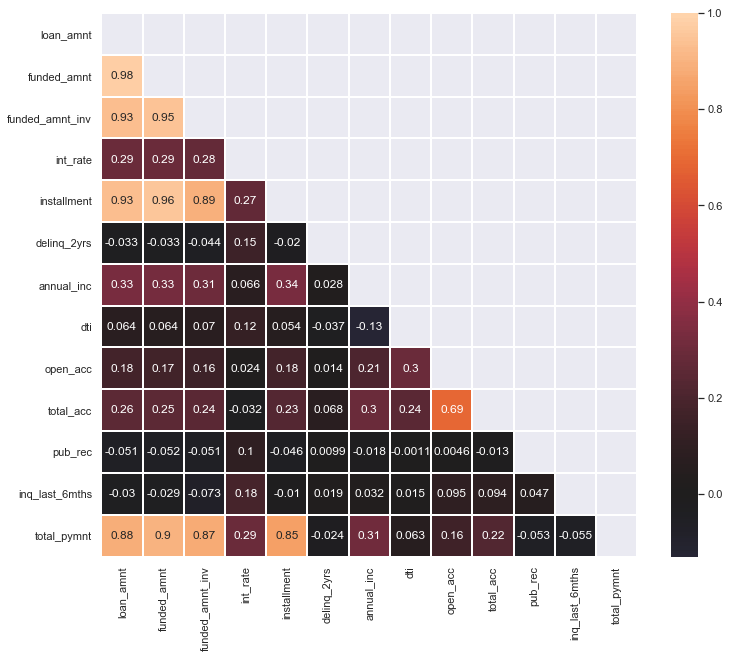

In [18]:
corr = df1[numeric_data].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr, mask=mask, annot=True, center=0, linewidths=1, ax=ax)
plt.show()

In [19]:
# correlation matrix of numeric variables
corr_df = df1[numeric_data].corr().abs()
mask = np.triu(np.ones_like(corr_df, dtype=bool))
tri_df = corr_df.mask(mask)
tri_df

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,delinq_2yrs,annual_inc,dti,open_acc,total_acc,pub_rec,inq_last_6mths,total_pymnt
loan_amnt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
funded_amnt,0.981763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
funded_amnt_inv,0.930135,0.948021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int_rate,0.292197,0.294995,0.280061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
installment,0.930845,0.956480,0.890768,0.271172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
delinq_2yrs,0.032689,0.033376,0.043701,0.154645,0.020078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annual_inc,0.331248,0.328361,0.305919,0.065795,0.336621,0.028200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dti,0.064492,0.064126,0.070130,0.119081,0.054247,0.037069,0.130028,NaN,NaN,NaN,NaN,NaN,NaN
open_acc,0.176310,0.174499,0.156487,0.024458,0.175079,0.013963,0.205764,0.297855,NaN,NaN,NaN,NaN,NaN
total_acc,0.256815,0.251023,0.240810,0.031728,0.233807,0.068232,0.297977,0.241061,0.693076,NaN,NaN,NaN,NaN


In [20]:
# Dropping features that are associated with multi collinarity
drop = [c for c in tri_df.columns if any(tri_df[c]>0.95)]
print(drop)

['loan_amnt', 'funded_amnt']


In [21]:
# Dropping features that are associated with multi collinarity
reduced_df = df1.drop(drop, axis=1)

In [22]:
print('Shape of reduced dataframe:', reduced_df.shape)

Shape of reduced dataframe: (42453, 21)


In [24]:
# Turning categorical data types into dummie variables
rdf = pd.get_dummies(reduced_df)
drop_columns = ['term_ 36 months', 'grade_A', 'emp_length_1 year', 'home_ownership_OTHER', 'verification_status_Not Verified',\
                'loan_status_Fully Paid', 'purpose_other', 'pub_rec_bankruptcies_no_bankruptcy']
rdf = rdf.drop(columns=drop_columns)

# Exporting to csv
rdf.to_csv('Loan_data_ML.csv')